In [182]:
from keras.layers import Dense, Input, Dropout
from keras.models import Model
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import Callback

%matplotlib inline

In [223]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, stratify=y)

In [258]:
inp = Input((4,), name='Inputs')
x = Dense(12, activation='relu', name='Hidden')(inp)
out = Dense(3, activation='softmax',name='Outputs')(x)

model = Model(inp, out)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          (None, 4)                 0         
_________________________________________________________________
Hidden (Dense)               (None, 12)                60        
_________________________________________________________________
Outputs (Dense)              (None, 3)                 39        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [259]:
weights_matrix = []
acc = []
val_acc = []
loss = []
val_loss = []

for _ in range(150):
    model.fit(X_train, y_train, epochs=1, verbose=0, validation_split=0.3)
    acc.append(model.history.history.get('acc')[0])
    val_acc.append(model.history.history.get('val_acc')[0])
    loss.append(model.history.history.get('loss')[0])
    val_loss.append(model.history.history.get('val_loss')[0])
    
    weights = model.layers[1].get_weights()[0]
    weights_matrix.append(weights)

In [266]:
weights_tensor = np.stack(weights_matrix)

(150, 4, 12)

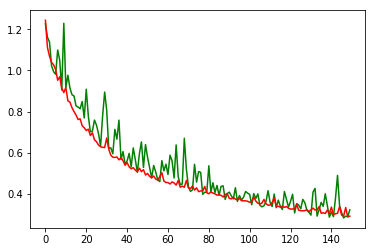

In [261]:
plt.plot(val_loss, 'g')
plt.plot(loss, 'r')

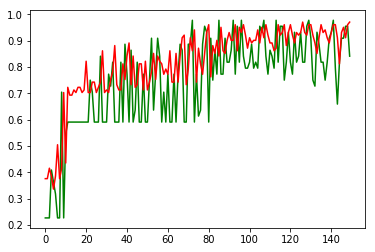

In [262]:
plt.plot(val_acc, 'g')
plt.plot(acc, 'r')

In [253]:
import seaborn as sns

In [273]:
w = weights_tensor[1,:,:]

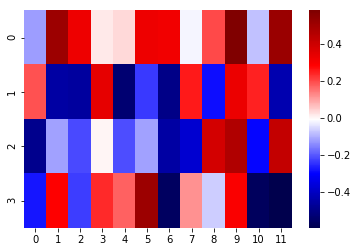

In [274]:
sns.heatmap(w, cmap='seismic')

In [289]:
print(weights_tensor.shape)

weights_flat_tensor = weights_tensor.reshape((150,48))
weights_flat_tensor.shape

(150, 4, 12)


(150, 48)

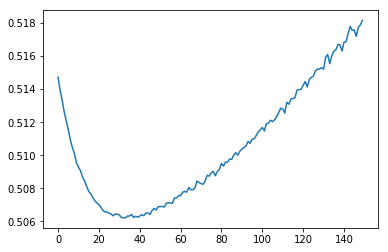

In [342]:
plt.plot(weights_flat_tensor[:,41])

In [325]:
from sklearn.metrics.pairwise import cosine_similarity

In [330]:
cs = cosine_similarity(weights_flat_tensor.T)

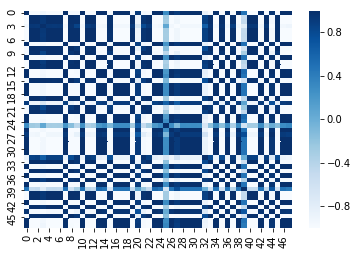

In [333]:
sns.heatmap(cs, cmap='Blues')